<a href="https://colab.research.google.com/github/inspire-lab/CyberAI-labs/blob/main/category-SecureAI/Evasion-attack-bypassing-ML-detectors/evasion_bypassing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adversarial Examples - Avoiding detection

Machine learning is often used to detect unwanted activies. Just think of spam detection, credit card fraud, malware detection and many more. We have built (or will be building depending on the order that you do the labs in) out own detectors. in Lab 1 we have build a detector for phishing web sites. It is pretty clear that the pepole behind such scams do not want to get flagged as none legitmate. But how can you actually do that? In this lab we will build our detector and then try to bypass it. We will be using the MNIST handwritten digit dataset. It consits of 60,000 handwritten digits. You can see and example of that looks like just below.
![](img/MnistExamples.png)
<center>MNIST examples - https://en.wikipedia.org/wiki/MNIST_database</center>

The detector we will build will be able to distinguish between `0` and `1`. Out goal is craft images that look very simialr to a `0` but are classified as a `1` or the other way round. The images are called adversarial examples

This openai (https://openai.com/blog/adversarial-example-research/) blog post descrtibes them as:
>Adversarial examples are inputs to machine learning models that an attacker has intentionally designed to cause the model to make a mistake; they’re like optical illusions for machines.

This image of a panda demonstrates how little needs to be added to an image to fool a classifier
![](img/adversarial_img_1.png)


We will start out by creating an `svm` based detector and will then fool it. Moving on to neural networks where we will look at more sophisticated attacks and defenses.


## Array shape

We will be working alot with `numpy.ndarray`(https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html). The are called `ndarray` because they are n dimensional arrays. You can think of them as a matrix. A very important property of the `ndarray` is its `shape`. The `shape` tells us its dimension. The notation is the same as it for matrices. The following 2x2 matrix can be written as an `ndarray` with `shape` [2,2]
$$
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
$$
The numpy equvilent would be:
```
a = numpy.ndarray( [[a,b][c,d]] )
```

The shape of an `ndarray` can be changed but only to another shape the holds the same number of elements. The number of elements is the product of all elemnts in the shape. In our case $2*2=4$. We can change the shape with the `reshape` function. We need to pass in the shape that we want our `ndarray` to take. We can transform our matrix into a column vector by calling `a.reshape( ( 4,1 ) )`. If we just want a row vector we can achieve this by calling `a.reshape( 4 )`. But there is an easier way to create row vectors we just need to pass the special vector `-1` to the reshape. This will always create a row vector withour us needing to worry how many elements are in our `ndarray`.

If you are unfimilar with the concept of reshaping we suggest you read this:

https://www.sharpsightlabs.com/blog/numpy-reshape-python/  

https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html

Let's get started! To begin we are importing a most of the packages we need. We are using the `scikit-learn` implementation of SVM. `numpy` for `ndarray` which will hold our data. `matplotlib` for displaying the images and `keras` provides us convient wrapper for the MNIST data set.

In [ ]:
from sklearn import svm
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.datasets import mnist

Since we are only interested in the 1s and 0s in the data, we will need to pick those out. Since we need to this for both the test and training data, let's write a function for it.

This function does a few other things as well.
- It normalizes the data, bringing it into the interval [0,1]
- It is also only using part of the data to make things a bit faster
- It also reshapes the data so we can use it with SVMs

In [ ]:
def exract_ones_and_zeroes( data, labels ):
    data_zeroes = data[ np.argwhere( labels == 0 ) ][ :200 ]
    data_ones = data[ np.argwhere( labels == 1 ) ][ :200 ]
    x = np.vstack( (data_zeroes, data_ones) )

    x = x.reshape( (x.shape[ 0 ], -1) ) / 255.

    print( x.shape )

    labels_zeroes = np.zeros( data_zeroes.shape[ 0 ] ) - 1.0
    labels_ones = np.ones( data_ones.shape[ 0 ] )
    y = np.append( labels_zeroes, labels_ones )

    return x, y

### Question
Take look at the function `extract_ones_and_zeroes`. Explain what every line is doing between line 5 and line 10 and why is it done.

__Line 6:__

__Line 7:__

__Line 8:__

__Line 9:__


```
Answers:
Line 6:  Flattens the image from 28x28 matrix into a row vector because SVMs can only work with vector inputs
Line 7: It quantizes the data, bringing it into the interval [0,1]. This is the best range for algorithms to work in
Line 8: Assigns -1 as the label for all zeros. We need labels of -1 and 1 to correctly learn the descion boundry
Line 9: Assigns 1 as the label for all ones.
```


Next we need to load the data and spilt it into training and testing sets.

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# extract ones and zeroes
x_train, y_train = exract_ones_and_zeroes( x_train, y_train )
x_test, y_test = exract_ones_and_zeroes( x_test, y_test )

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(400, 784)
(400, 784)


We are going to define an SVM (for a refresher on SVMs: https://scikit-learn.org/stable/modules/svm.html) with a RBF (radial basis function) kernel and train it.
Once training is done we are going to print the accuracy and show one of the images.


When running the next cell a message like the one below might appear. We can safley ignore that.
```
/home/robert/.local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
```



### Question 1

Create an SMV of type `SVC` with default parameters and train it on the training data that we have loaded earlier. Once trained print the accuracy on the test set.


accuracy on test set: 1.0


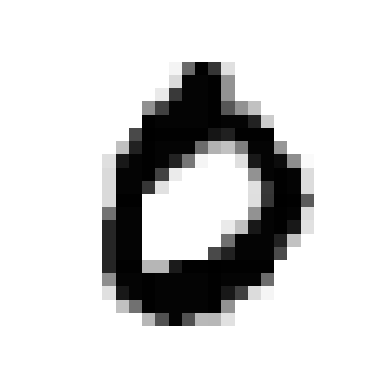

Predicted class: 0


In [ ]:

### your code goes here
# clf = # varialbe to hold the SVM instance

# solution_start
clf = svm.SVC( gamma='auto' )
clf.fit( x_train, y_train )
print( 'accuracy on test set:', clf.score( x_test, y_test ) )
# solution_end


# plot the first instance in the traning set
plt.imshow( x_test[ 0 ].reshape( 28, 28 ), cmap="gray_r" )
plt.axis( 'off' )
plt.show( )

predictions = clf.predict(x_test[ 0 ].reshape(1, -1))
print("Predicted class:", np.argmax(predictions))

Let's see how our svm performs when we create our own legitmate examples. To this we are going to open `KolourPaint` or any other image editor of your choice. (You can find `KolourPaint` in the side bar if you are using the VM). We want to great a 28 by 28 pixel greyscale image. The background should be all black an we draw into with white.

The first thing we want to do is make sure our image is the correct size. To do this we go to the `Image` menu and select `Resize / Scale...`

![](img/kp00.png)
![](img/kp01.png)

In the resize window we can see that the original size is already 28x28. So we do not need to anything. If it was something else we could simply enter 28 as both the Widht and Height and hit `OK`.

![](img/kp03.png)


Next we use the `Flood Fill` tool (red circle in the image below) to set the entire background to black. Select the tool and the color black. Click into the image. It should be solid black now like in the screenshot.

![](img/kp04.png)

Now it is time to draw our digit. I have chosen to draw (a beautiful) one. Choose the color white and a the `Brush` or `Pen` tool to draw your digit.
![](img/kp05.png)

Once you are happy with your masterpiece. Select `Save As...` from the `File` menu. As a save loacation chose `/home/sec-lab/security-labs/lab9/test_images/`. Give the file a nice name. Make sure you are that you are choosing `Monochrome (Dithered)` in the `Convert to:` drop down box. Once you hit save there will probably be an error message like this:
```
Saving the image at the low color depth of 1-bit may result in the loss of color information. Any transparency might also be removed.
Are you sure you want to save at this color depth?
```
You can ignore this. Just hit `Save`  

![](img/kp06.png)



Let see how our classifier performs. The block of code below loads the image into a numpy array and displays it. We are using the imageio package for that.

(28, 28, 3)


<ipython-input-5-bf389e7a36cb>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread( 'test_images/one.png' )


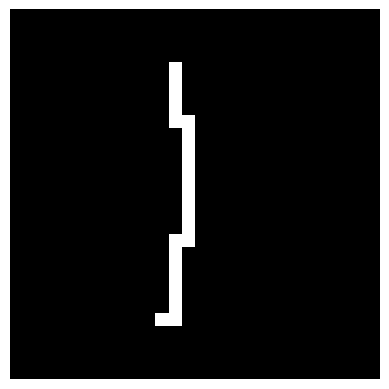

In [ ]:
import imageio

# loads the one I just drew
im = imageio.imread( 'test_images/one.png' )
print( im.shape )

# show the image
plt.imshow( im, cmap="gray_r" )
plt.axis( 'off' )
plt.show()

### Question 2
For this part of the exercise draw two images. A 0 and 1. Save them in the `test_images` folder. After that use load them into python and display them. Fort the final step we want to what the classifier predicts for those images. In order to do so you need to change the data type of the image. When `imageio` loads the image it loads the values as integers (details about numpy data types https://docs.scipy.org/doc/numpy/user/basics.types.html). The values nned squashed to be in the interval [0,1]. To check if you did the squashing correctly display it again. Lastly we need to reshape the image. It will be loaded as an array with the shape [28,28] but the classifer expects inputs of the shape [782].

Summed up:

1. Draw a 0 and 1
2. Save them
3. Load with python
4. Display images
5. Change datatype
6. Qunatize values
7. Display quantized images
8. Reshape data
9. Use the classifier on the data

<ipython-input-71-6ab66a8ee2cb>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread( 'test_images/zero.png' )


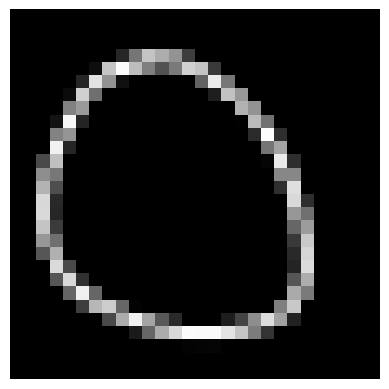

(28, 28, 3)


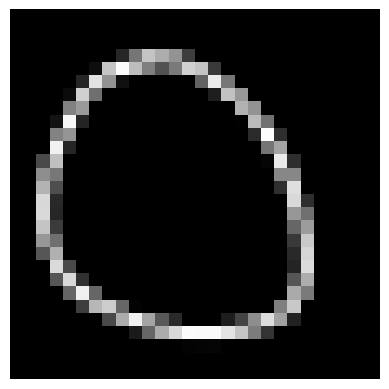

(3, 784)
Predicted class: 0


In [ ]:
# solution_start
# loading the image file
im = imageio.imread( 'test_images/zero.png' )
# display the image
plt.imshow( im, cmap="gray_r" )
plt.axis( 'off' )
plt.show()
# change datatype
im = im.astype( float )
# quantize
im /= 255.

print(im.shape)
#im = im[:, :, 1]
# display again
plt.imshow( im, cmap="gray_r" )
plt.axis( 'off' )
plt.show()


im = im.reshape(3, 784)
print(im.shape)
# Resize the image to 28x28 if necessary
#im = im.reshape(-1)
#im = im.reshape(3, 28 * 28)


# Use the classifier to predict the class
predictions = clf.predict(im.reshape(3, 784))
print("Predicted class:", np.argmax(predictions))



### Question 3
Open on of your self drawn instances in `kolourpaint` again try to modify until the classifier predicts it incorrectly. Provide code the displays the modified instance and the classifictioan result.

In [ ]:
### code for question 3 goes here

To evade the classifier, we first pick a sample that we want to change. After that we need to retrieve some of the parameters of the SVM which we will need to calculate the gradients.

class prediction for the test samples: [1.]


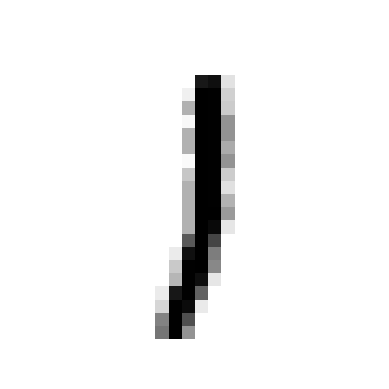

In [ ]:
# constructing adversarial examples
sample = x_test[ 256 ]
print( 'class prediction for the test samples:', clf.predict( [ sample ] ) )

# Retrieve the internal parameters from the SVM
alpha = clf.dual_coef_
svs = clf.support_vectors_
nsv = svs.shape[ 0 ]
b = clf.intercept_

plt.imshow( sample.reshape( 28, 28 ), cmap="gray_r" )
plt.axis( 'off' )
plt.show( )

Now that we have the internal parameters we can calcuate the gradients of the SVM and apply the modifications to our selected sample. `lmbd` controlls the strength of the modifications, `target` is the desired class and `sample` is the instance we want to modify

In [ ]:
def modify( lmbd, target, sample ):
    """
    lambda: strength of the modification
    target: class
    sample: the sample to modify
    """

    # the sample we modify
    mod_sample = sample[ : ]

    # Compute the kernel row matrix and kernel gradients for xc
    kgrad = np.empty( svs.shape )

    # for all support vectors
    for i in range( nsv ):
        sv = svs[ i, : ]  # support vector x_i
        k = -2 * clf._gamma * np.exp( -clf._gamma * np.sqrt( np.sum( np.square( mod_sample - svs ) ) ) ) * (
                mod_sample - sv)
        dk = clf._gamma * k * (svs[ i, : ] - mod_sample)
        kgrad[ i, : ] = k


    # the direction that we move the sample in
    grad = target * np.dot( alpha, kgrad )

    # modify the sample
    mod_sample = np.clip( mod_sample + lmbd * grad, 0.,1.)

    mod_sample = np.clip( mod_sample, 0., 1. )
    print( 'class prediction for the original sample:', clf.predict( [sample] ) )
    print( 'class prediction for the modified sample:', clf.predict( mod_sample ) )
    print( 'original sample:')
    plt.imshow( sample.reshape( 28, 28 ), cmap="gray_r" )
    plt.show( )
    print( 'modified sample:')
    plt.imshow( mod_sample.reshape( 28, 28 ), cmap="gray_r" )
    plt.show( )


    print( 'difference between the two samples:')
    plt.imshow( np.abs(sample-mod_sample).reshape( 28, 28 ), cmap="gray_r" )
    plt.show( )

    return mod_sample

### Question 4
Using the `modify` function try different values for `lmdb` for the sample in the code below. Which values work best?

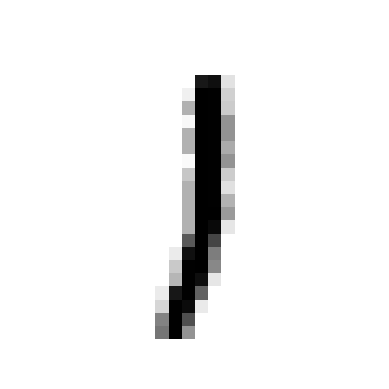

class prediction for the original sample: [1.]
class prediction for the modified sample: [-1.]
original sample:


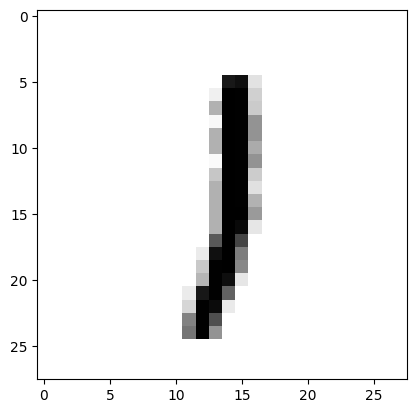

modified sample:


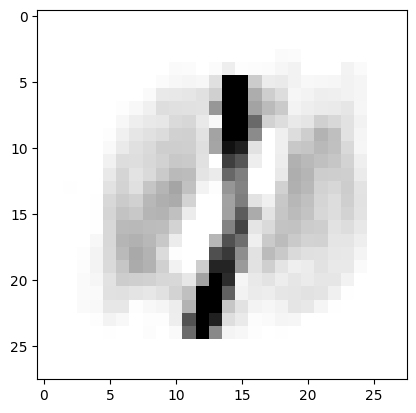

difference between the two samples:


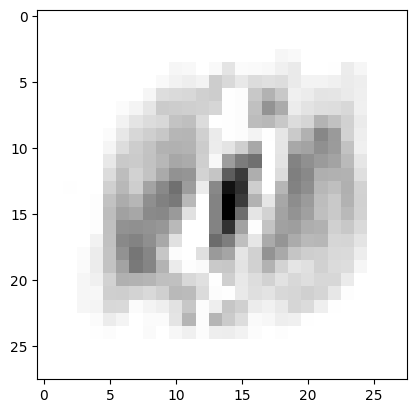

In [ ]:
sample = x_test[ 256 ]

# solution_start
plt.imshow( sample.reshape( 28, 28 ), cmap="gray_r" )
plt.axis( 'off' )
plt.show( )

mod = modify( 10, -1, sample )
# solution_end

### Question 5
Use the `modify` function to have your self drawn samples missclassified. Write the code in the cell below. What values did you try?
